# Simulating grid cells

We will start by generating the spike train of grid cells

This allows us to test the model and our method first in a controlled environment.

In the simulation, we can set the number, orientation, phase of grid cells that we need.

The package we use is called spikeA. This allows for generating firing rate maps.

The path of the Random Foraging path is from one real recording session. This is located in the data folder.

In [56]:
%load_ext autoreload
%autoreload 2

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import spikeA
from spikeA.Spike_train import Spike_train
from spikeA.Animal_pose import Animal_pose
from spikeA.Spatial_properties import Spatial_properties
from spikeA.Neuron import Simulated_place_cell, Simulated_grid_cell
from scipy.stats import multivariate_normal
from scipy.stats import poisson
from scipy.interpolate import interp1d
from tqdm import tqdm
from scipy import stats
from scipy import ndimage

from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parameters

In [3]:
# Location of animal position files
firstRF = "../data/jp451_lstm_firstRF.npy"
lastRF = "../data/jp451_lstm_lastRF.npy"

In [4]:
# GLOBAL VARIABLES
GLOBALFONTSIZE = 12

# Check animal position

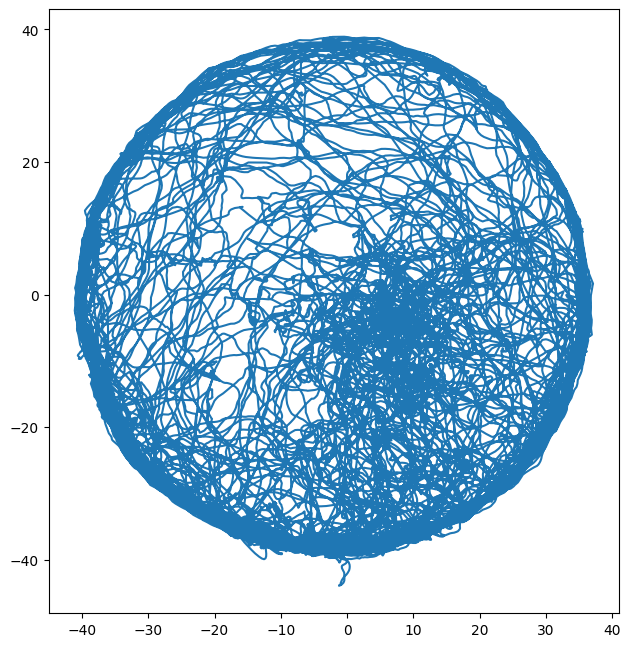

In [5]:
ap = Animal_pose()
ap.load_pose_from_file(file_name=firstRF)

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(ap.pose[:,1],ap.pose[:,2])
ax.set_aspect('equal')  

# Simulate one grid cell

In [44]:
grid_param = {}
grid_param["orientation"] = np.array([0,np.pi/3,np.pi/3*2])
grid_param["period"] = np.array([30,30,30])
grid_param["offset"] = np.array([10,0])
grid_param["peak_rate"] = 20

In [45]:
%%time
sgc = Simulated_grid_cell(name="pc1",
                          offset=grid_param["offset"],
                          orientation=grid_param["orientation"],
                          period=grid_param["period"],
                          peak_rate=grid_param["peak_rate"],
                          ap=ap)

CPU times: user 1.49 s, sys: 4.57 s, total: 6.06 s
Wall time: 5.25 s


Text(0, 0.5, 'Spikes')

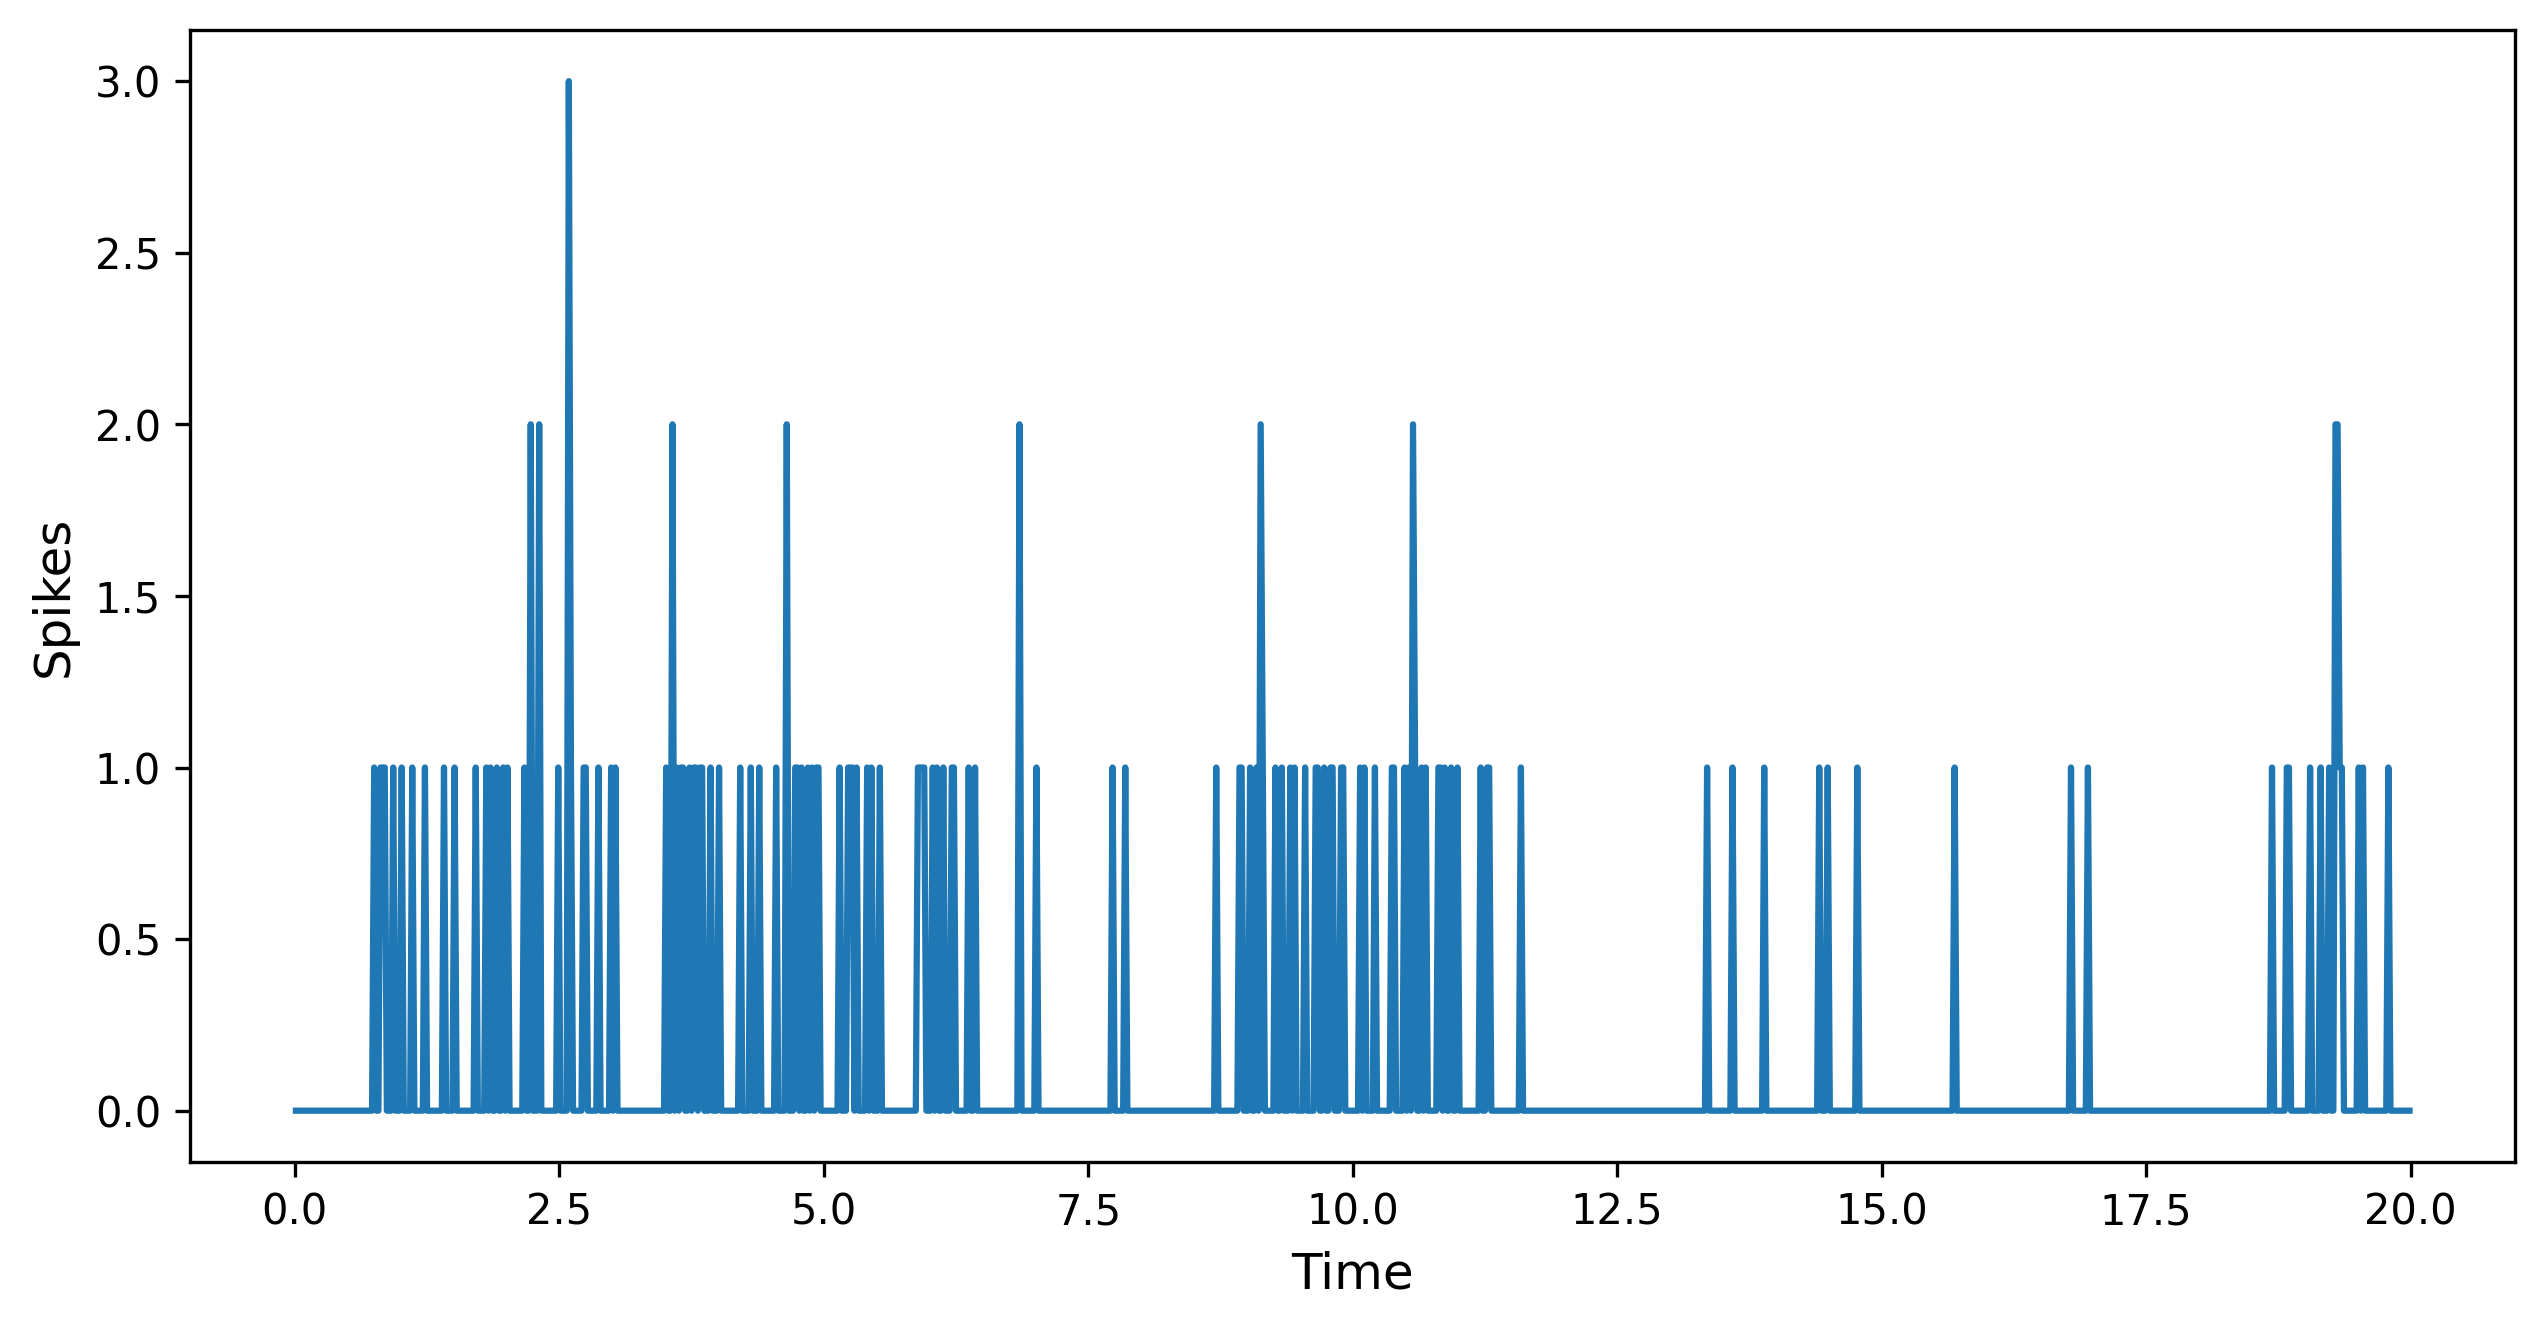

In [46]:
# This is the spike train of the neuron
sgc.spike_train.instantaneous_firing_rate(bin_size_sec=0.02,sigma=2)
ifrSgc = sgc.spike_train.ifr[0]
spikeSgc = sgc.spike_train.ifr[1]
timeSgc = sgc.spike_train.ifr[2]

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(timeSgc[:1000],spikeSgc[:1000])

ax.set_xlabel('Time',fontsize=GLOBALFONTSIZE)
ax.set_ylabel('Spikes',fontsize=GLOBALFONTSIZE)


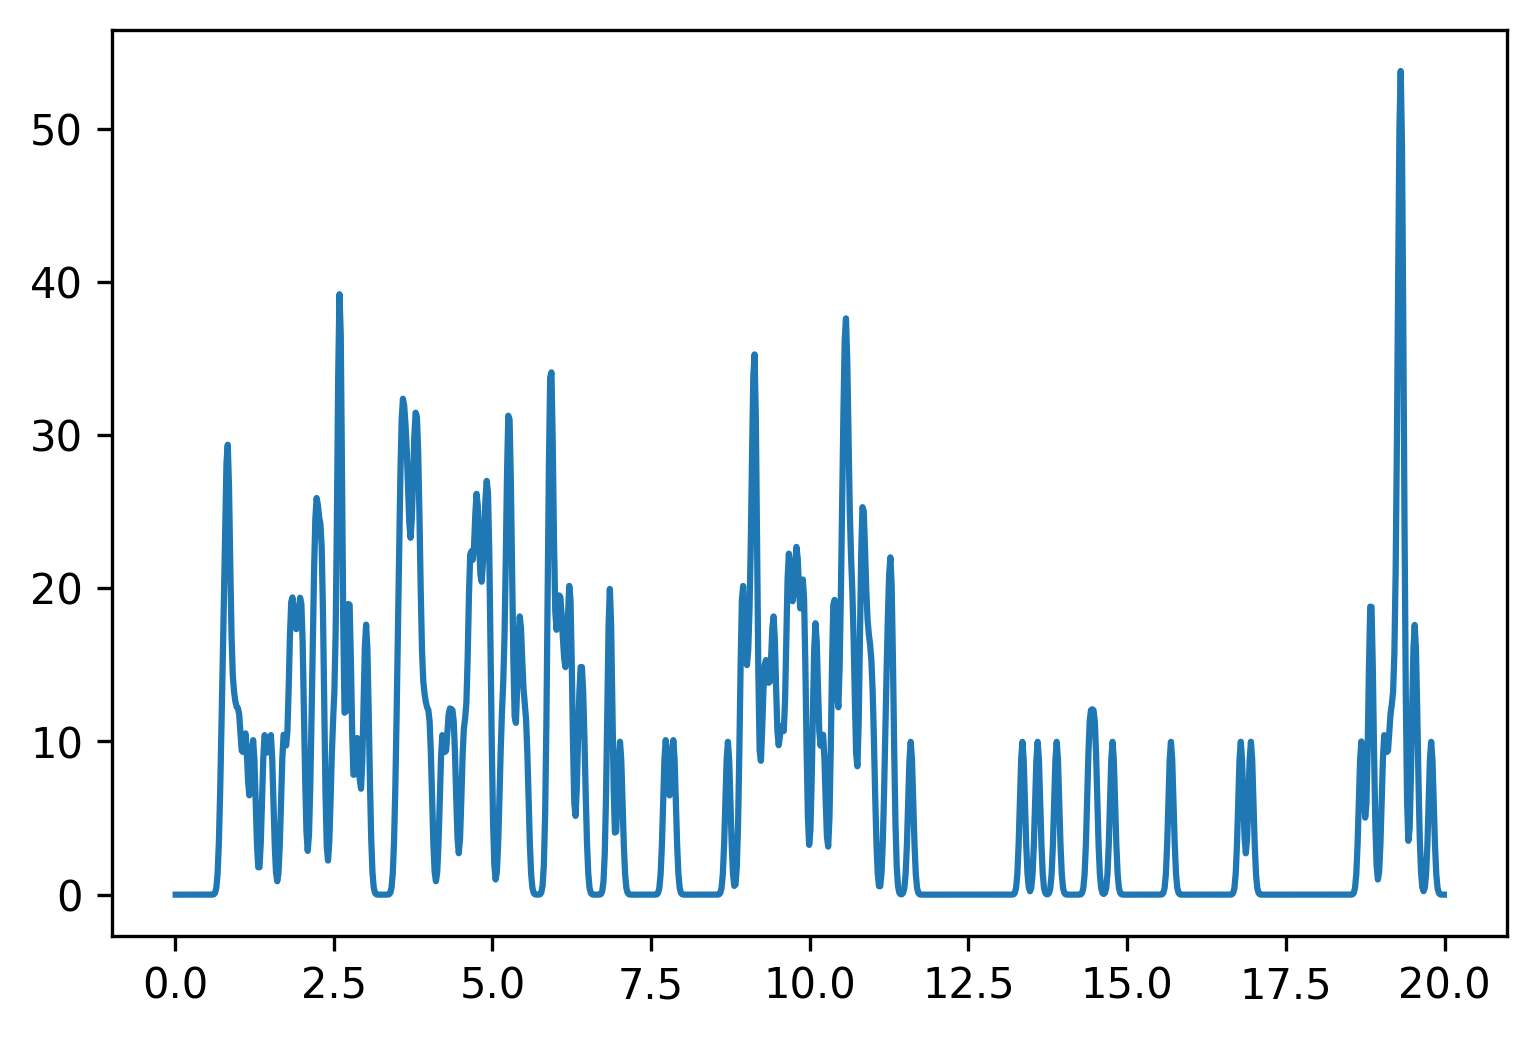

In [47]:
# Add IFR of the simulated neuron
fig, ax = plt.subplots()
ax.plot(timeSgc[:1000],ifrSgc[:1000])

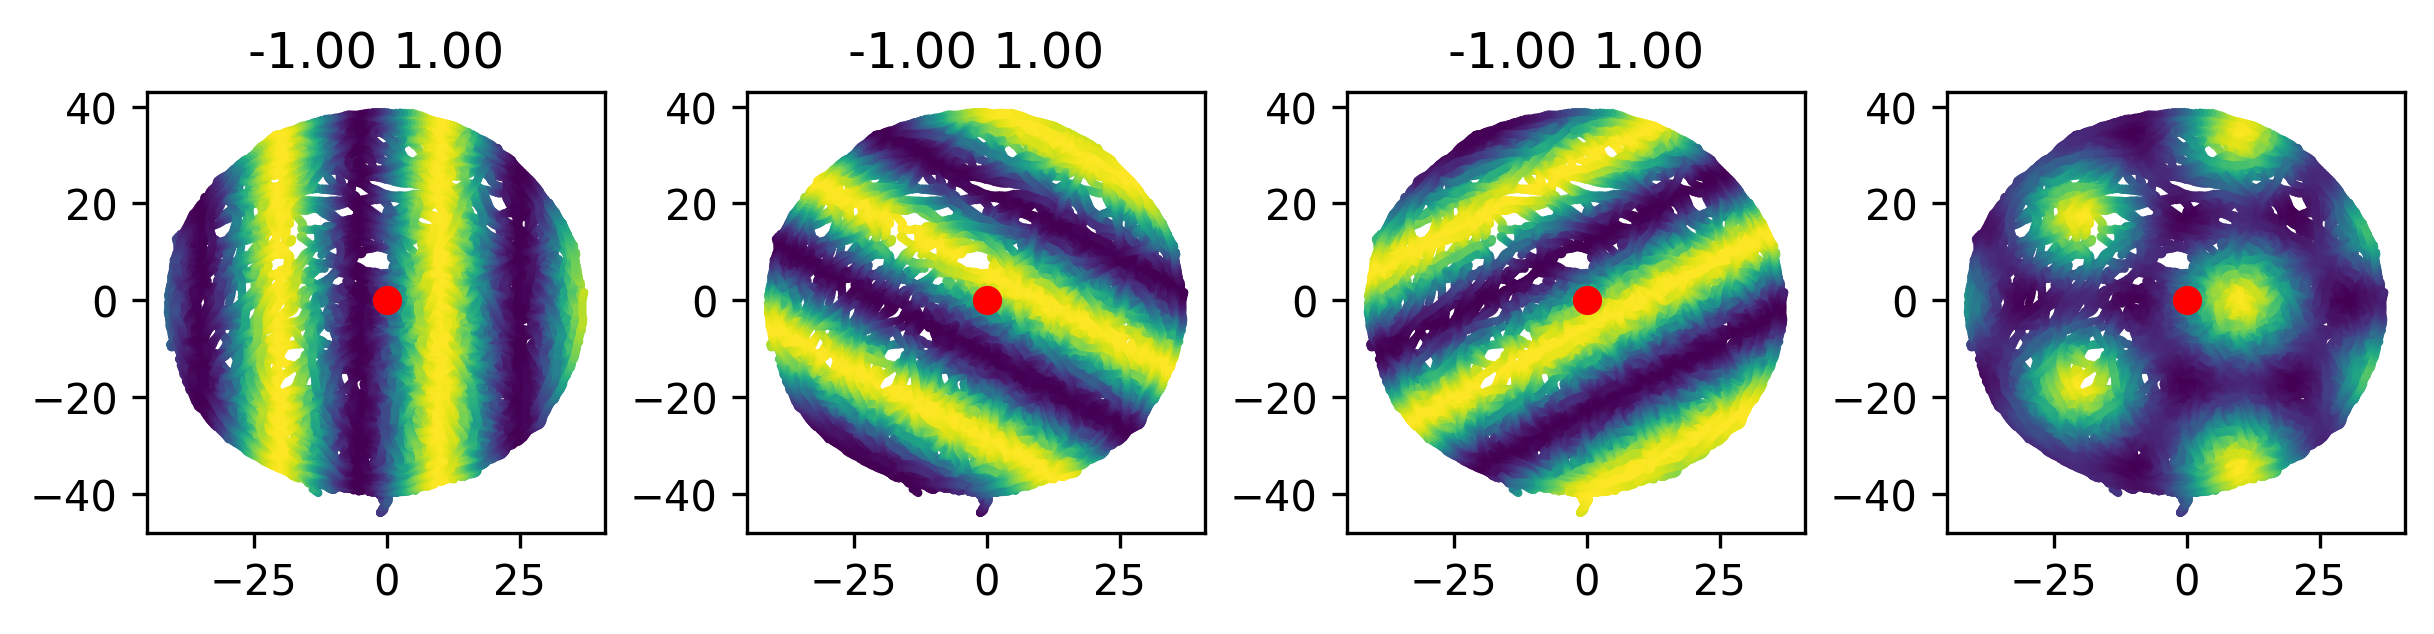

In [48]:
# This is th 2D firing rate map of the simulated neuron and the three axis of the grid
rowSize,colSize= 2,2 
ncols=4
nrows=1
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) 
mainSpec = fig.add_gridspec(ncols=ncols, nrows=1)

ax = fig.add_subplot(mainSpec[0])
ax.scatter(ap.pose[:,1],ap.pose[:,2],s=1,c=sgc.rateC0)
ax.scatter([0],[0],color="red")
ax.set_title("{:.2f} {:.2f}".format(np.min(sgc.rateC0), np.max(sgc.rateC0)))

ax = fig.add_subplot(mainSpec[1])
ax.scatter(ap.pose[:,1],ap.pose[:,2],s=1,c=sgc.rateC1)
ax.scatter([0],[0],color="red")
ax.set_title("{:.2f} {:.2f}".format(np.min(sgc.rateC1), np.max(sgc.rateC1)))


ax = fig.add_subplot(mainSpec[2])
ax.scatter(ap.pose[:,1],ap.pose[:,2],s=1,c=sgc.rateC2)
ax.scatter([0],[0],color="red")
ax.set_title("{:.2f} {:.2f}".format(np.min(sgc.rateC2), np.max(sgc.rateC2)))

ax = fig.add_subplot(mainSpec[3])
ax.scatter(ap.pose[:,1],ap.pose[:,2],s=1,c=sgc.rate)
ax.scatter([0],[0],color="red")

# Visualizing this grid cell

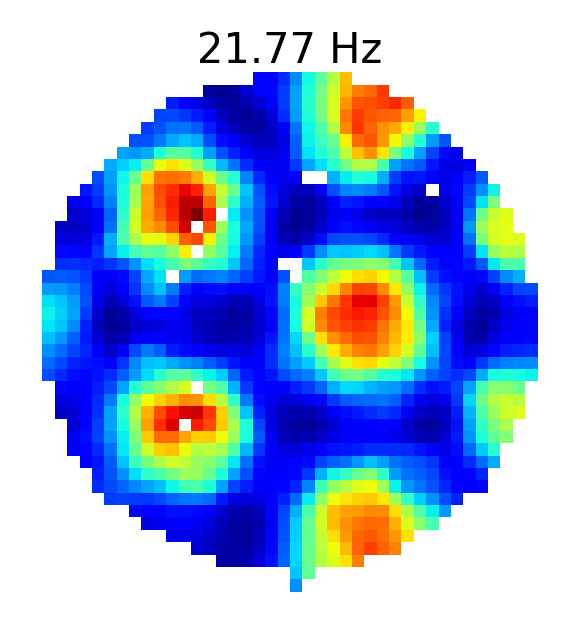

In [49]:
# Plot grid cell
rowSize,colSize= 2,2 
ncols=1
nrows=1
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) 
mainSpec = fig.add_gridspec(ncols=ncols, nrows=1)

ax = fig.add_subplot(mainSpec[0,0])
sgc.spatial_properties.firing_rate_map_2d()
plotMap(ax,sgc.spatial_properties.firing_rate_map,title = "{0:.2f} Hz".format(np.nanmax(sgc.spatial_properties.firing_rate_map)))

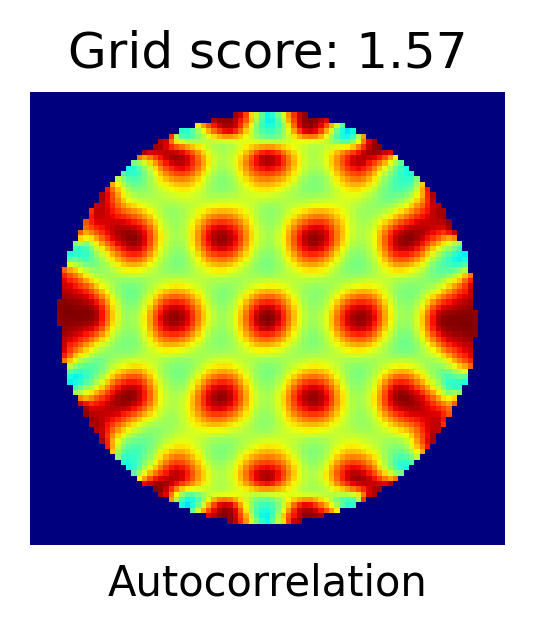

In [51]:
# Plot grid cell
rowSize,colSize= 2,2 
ncols=1
nrows=1
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) 
mainSpec = fig.add_gridspec(ncols=ncols, nrows=1)

ax = fig.add_subplot(mainSpec[0,0])
plot_spatial_autocorrelation(ax,sgc)

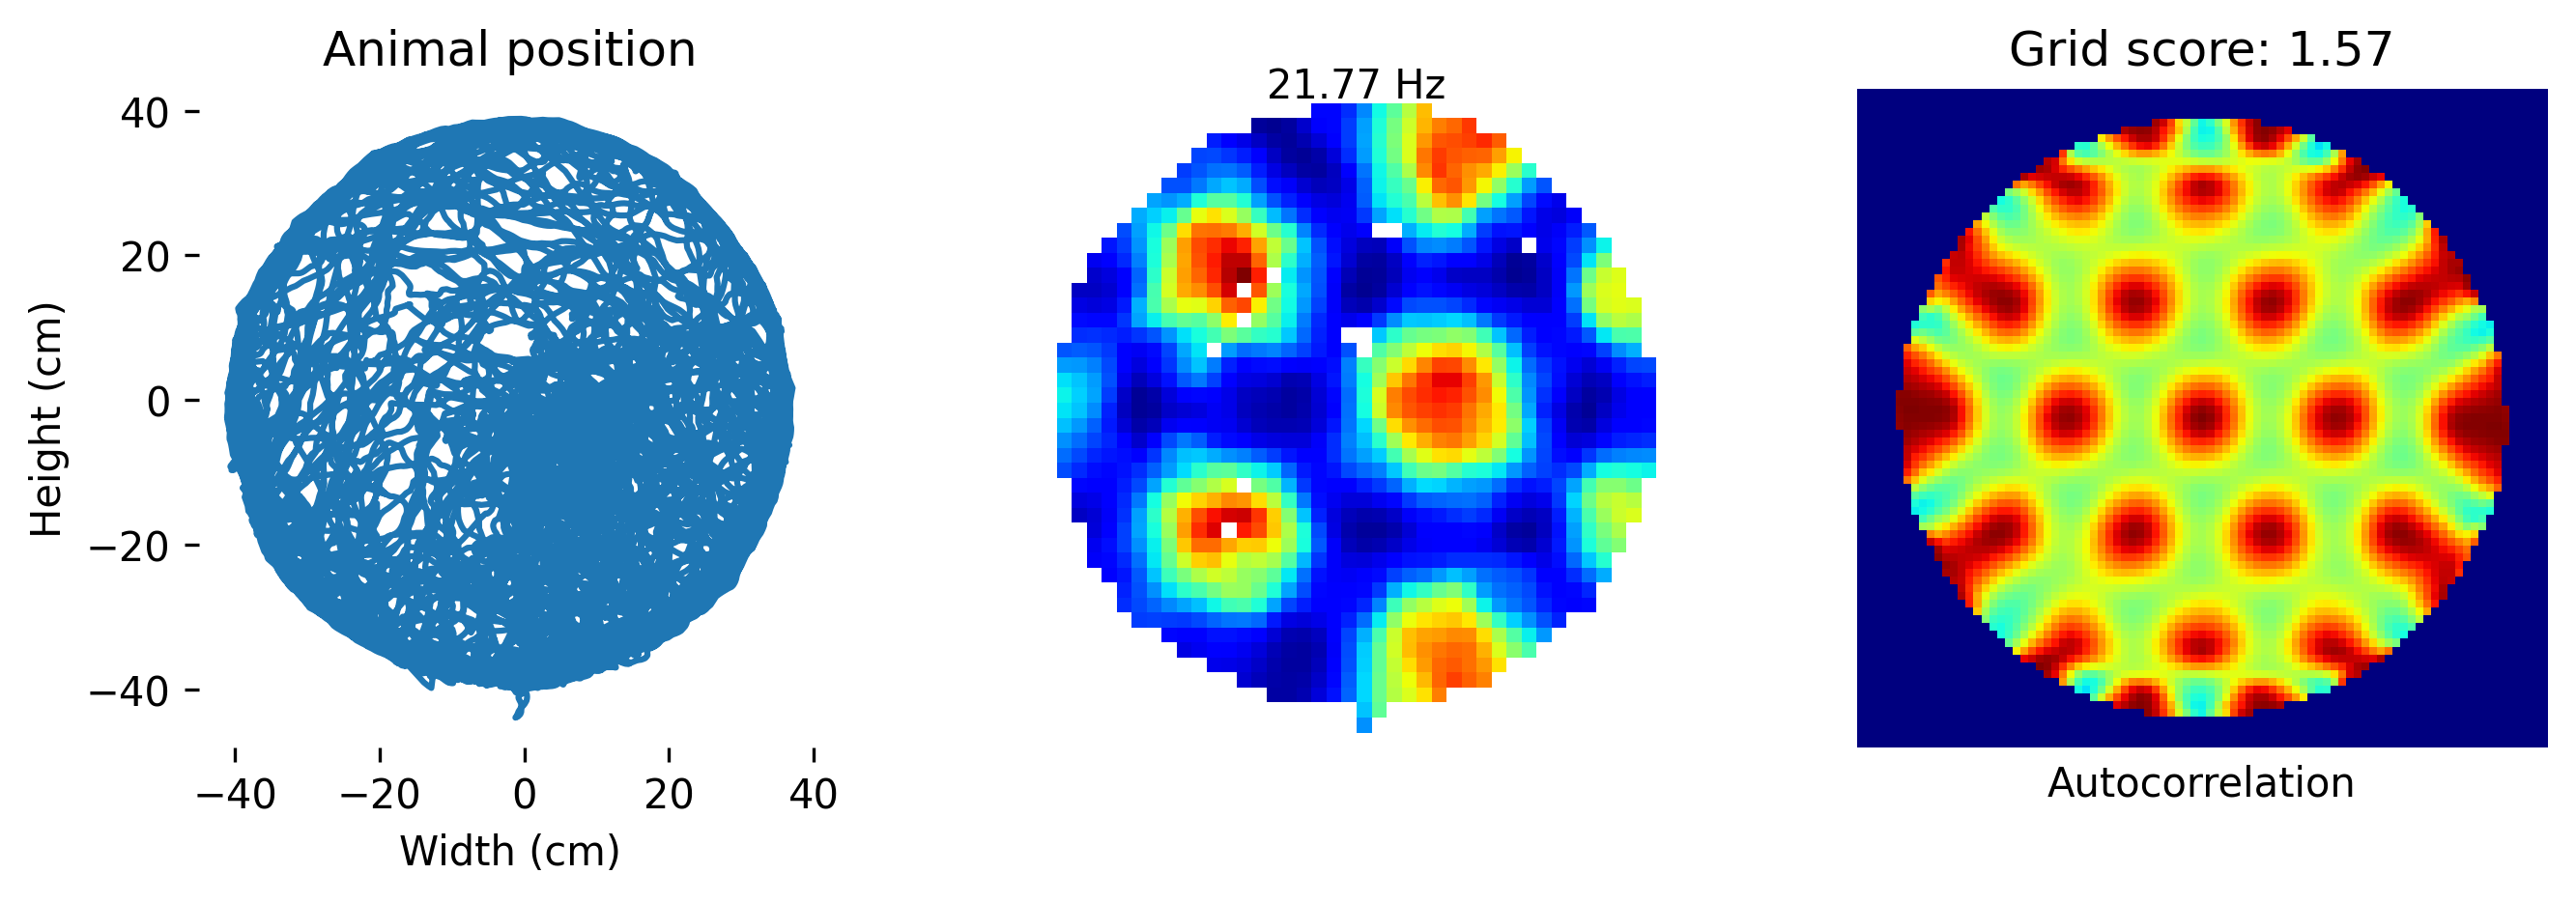

In [55]:
rowSize,colSize= 3,3
ncols=3
nrows=1
fig = plt.figure(figsize=(ncols*colSize, nrows*rowSize), constrained_layout=True) 
mainSpec = fig.add_gridspec(ncols=ncols, nrows=1)
plt.rcParams['figure.dpi'] = 300

ax = fig.add_subplot(mainSpec[0,0])
ax.plot(ap.pose[:,1],ap.pose[:,2])
ax.set_aspect('equal') 
ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Animal position')

ax = fig.add_subplot(mainSpec[0,1])
sgc.spatial_properties.firing_rate_map_2d()
plotMap(ax,sgc.spatial_properties.firing_rate_map,title = "{0:.2f} Hz".format(np.nanmax(sgc.spatial_properties.firing_rate_map)))

ax = fig.add_subplot(mainSpec[0,2])
plot_spatial_autocorrelation(ax,sgc)

fig.savefig('../img/notebook1.png')